# Import and Load

In [2]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
import numpy as np
import matplotlib.dates as mdates
import datetime

plt.style.use('fivethirtyeight')
sns.set_context("notebook")

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
bike_weather = pd.read_csv('/content/drive/MyDrive/CIV1498 Final Project/Data/cleaned_data3/period_bike_and_weather_new_header.csv')
#weather = pd.read_csv('/content/drive/MyDrive/CIV1498 Final Project/Data/cleaned_data3/period_weather_2.csv')
bike_weather

,Unnamed: 0,Time,Year,Month,Day,Period,Weekday,is_holiday,is_weekend,Mean Temp (°C),...,Rel Hum (%),Wind Dir (10s deg),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather,Total Trips,Member Trips,Casual Trips,Mean Trip Duration (sec)
0,0,2017-01-01,2017,1,1,1,6,True,True,1.250000,...,67.666667,25.666667,33.500000,16.10,100.218333,Clear,69,65,4,593.086957
1,1,2017-01-01,2017,1,1,2,6,True,True,0.075000,...,68.750000,25.000000,28.750000,16.10,100.857500,Clear,18,18,0,491.555556
2,2,2017-01-01,2017,1,1,3,6,True,True,2.220000,...,57.200000,23.800000,20.200000,16.10,101.222000,Clear,116,96,20,784.103448
3,3,2017-01-01,2017,1,1,4,6,True,True,2.425000,...,58.250000,22.750000,17.250000,16.10,101.427500,Clear,171,141,30,697.105263
4,4,2017-01-01,2017,1,1,5,6,True,True,1.000000,...,74.600000,23.800000,12.600000,16.10,101.704000,Clear,108,92,16,691.777778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8970,8970,2021-11-30,2021,11,30,1,1,False,False,-0.533333,...,74.500000,28.333333,9.166667,16.10,100.428333,Clear,135,42,93,612.377778
8971,8971,2021-11-30,2021,11,30,2,1,False,False,-0.050000,...,84.750000,20.333333,9.750000,9.35,100.287500,Precipitation,821,318,503,687.566382
8972,8972,2021-11-30,2021,11,30,3,1,False,False,1.480000,...,89.600000,18.666667,6.000000,13.68,100.130000,Clear,1085,411,674,626.935484
8973,8973,2021-11-30,2021,11,30,4,1,False,False,2.650000,...,84.750000,23.750000,16.750000,16.10,100.032500,Clear,1788,630,1158,695.394295


# Temporal Relationship

In [5]:
# Convert to Datatime format for further processing
bike_weather['Time'] = pd.to_datetime(bike_weather['Time'])
bike_weather = bike_weather.set_index(bike_weather['Time'])
bike_weather.drop(columns=['Unnamed: 0'], inplace = True)
bike_weather.columns

Index(['Time', 'Year', 'Month', 'Day', 'Period', 'Weekday', 'is_holiday',
       'is_weekend', 'Mean Temp (°C)', 'Dew Point Temp (°C)', 'Rel Hum (%)',
       'Wind Dir (10s deg)', 'Wind Spd (km/h)', 'Visibility (km)',
       'Stn Press (kPa)', 'Weather', 'Total Trips', 'Member Trips',
       'Casual Trips', 'Mean Trip Duration (sec)'],
      dtype='object')

In [6]:
# Resample into one day interval
bike_weather_day = (bike_weather.resample('1D')
                    .agg({'Weekday': 'min', 'is_holiday': 'min', 'is_weekend': 'min',
                          'Mean Temp (°C)': 'mean',
                          'Total Trips': 'sum',
                          'Member Trips': 'sum',
                          'Casual Trips': 'sum',
                          'Mean Trip Duration (sec)': 'mean'
                          })
                    #.reset_index()
                    )
bike_weather_day

,Weekday,is_holiday,is_weekend,Mean Temp (°C),Total Trips,Member Trips,Casual Trips,Mean Trip Duration (sec)
Time,,,,,,,,
2017-01-01,6,True,True,1.394000,482,412,70,651.525800
2017-01-02,0,True,False,2.972000,826,756,70,623.044149
2017-01-03,1,False,False,4.285667,871,853,18,672.256168
2017-01-04,2,False,False,-1.117667,1395,1361,34,611.221527
2017-01-05,3,False,False,-6.825000,1210,1191,19,614.611909
...,...,...,...,...,...,...,...,...
2021-11-26,4,False,False,0.631000,6865,2491,4374,643.014368
2021-11-27,5,False,True,-0.189667,6195,2263,3932,665.702049
2021-11-28,6,False,True,-0.421333,1738,613,1125,706.586484


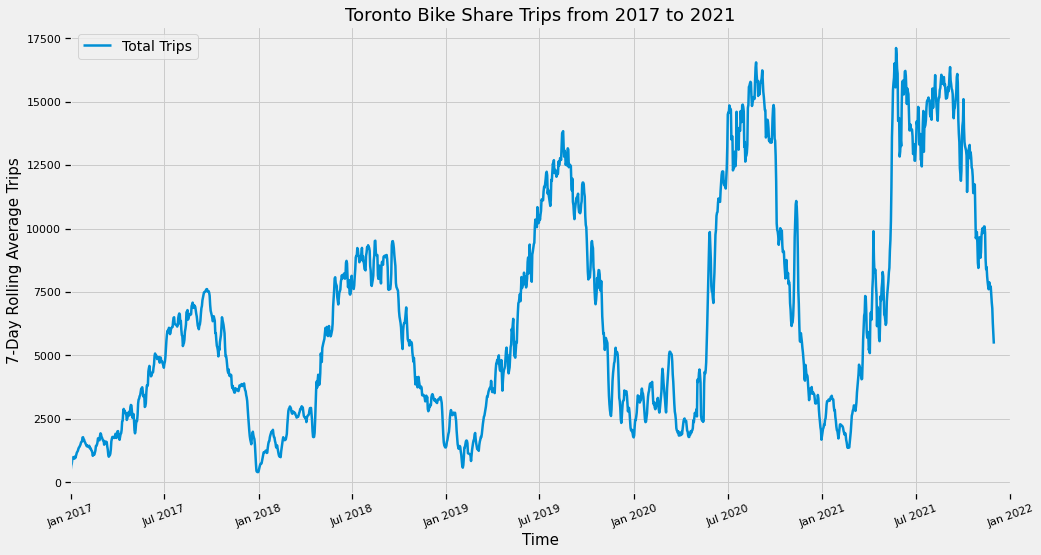

In [17]:
# Calculate Rolling 7-day average for better visualization
bike_rolling_day = bike_weather_day.rolling('7D').mean().reset_index()

#fig, axs = plt.subplots(2,figsize=(16,9),gridspec_kw={'height_ratios': [3, 1]})
plt.figure(figsize=(15, 8))
ax = sns.lineplot(data=bike_rolling_day, x='Time', y='Total Trips', linewidth=2.5, label = 'Total Trips' )

ax.xaxis.set_major_locator(mdates.MonthLocator(interval = 6))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

ax.tick_params(axis='x', rotation=20)
ax.set_xlim([datetime.date(2017,1,1), datetime.date(2022,1,1)])

ax.set_xlabel('Time', fontsize = 15)
ax.set_ylabel('7-Day Rolling Average Trips', fontsize = 15)
ax.legend(fontsize = 14)
ax.set_title('Toronto Bike Share Trips from 2017 to 2021', fontsize=18)
plt.show()

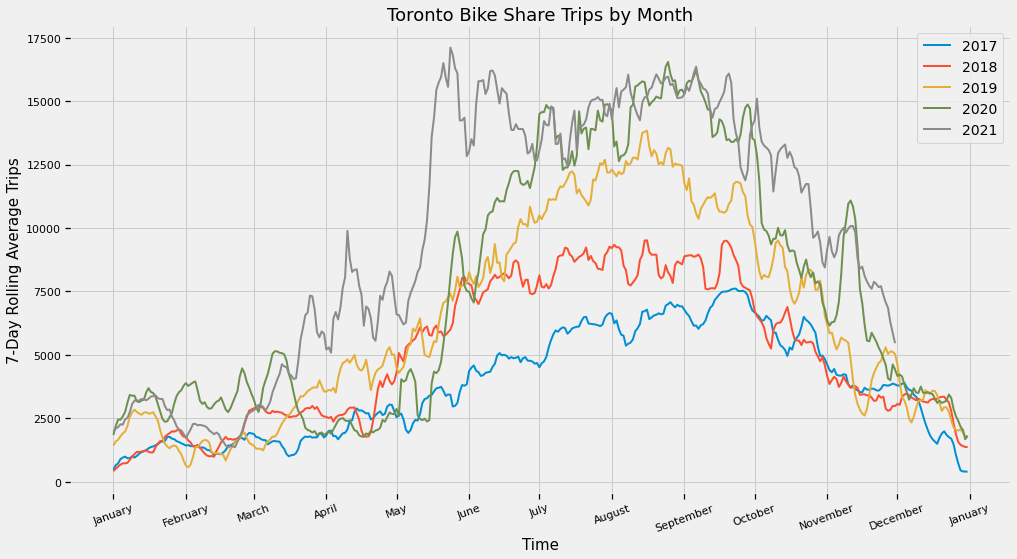

In [16]:
plt.figure(figsize=(15, 8))

for i in range(2017, 2022, 1):
    monthly = bike_rolling_day[bike_rolling_day['Time'].dt.year == i]
    monthly_new = monthly.copy(deep=True)
    monthly_new['Time'] = monthly['Time'].apply(lambda x: x.replace(year = 2000)) # Create dummy year
    ax = sns.lineplot(data=monthly_new,x='Time', y='Total Trips', linewidth=2, label = i)
    
ax.xaxis.set_major_locator(mdates.MonthLocator(interval = 1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%B'))

ax.tick_params(axis='x', rotation=20)
#ax.set_xlim([datetime.date(2017,1,1), datetime.date(2022,1,1)])

ax.set_xlabel('Time', fontsize = 15)
ax.set_ylabel('7-Day Rolling Average Trips', fontsize = 15)
ax.legend(fontsize = 14)
ax.set_title('Toronto Bike Share Trips by Month', fontsize=18)
plt.show()

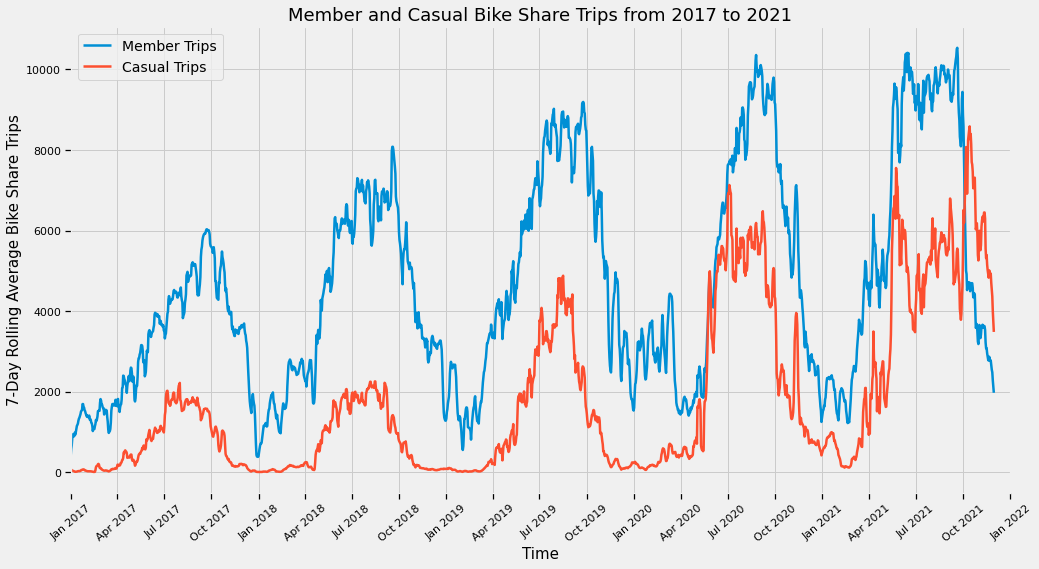

In [34]:
# Calculate Rolling 7-day average for better visualization
bike_rolling_day = bike_weather_day.rolling('7D').mean().reset_index()

#fig, axs = plt.subplots(2,figsize=(16,9),gridspec_kw={'height_ratios': [3, 1]})
plt.figure(figsize=(15, 8))
ax = sns.lineplot(data=bike_rolling_day, x='Time', y='Member Trips', linewidth=2.5, label = 'Member Trips' )
ax = sns.lineplot(data=bike_rolling_day, x='Time', y='Casual Trips', linewidth=2.5, label = 'Casual Trips')
#ax = sns.lineplot(data=bike_rolling_day, x='Time', y='Mean Temp (°C)', linewidth=2.5, ax=axs[1])

ax.xaxis.set_major_locator(mdates.MonthLocator(interval = 3))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

ax.tick_params(axis='x', rotation=40)
ax.set_xlim([datetime.date(2017,1,1), datetime.date(2022,1,1)])

ax.set_xlabel('Time', fontsize = 15)
ax.set_ylabel('7-Day Rolling Average Bike Share Trips', fontsize = 15)
ax.legend(fontsize = 14)
ax.set_title('Member and Casual Bike Share Trips from 2017 to 2021', fontsize=18)
plt.show()

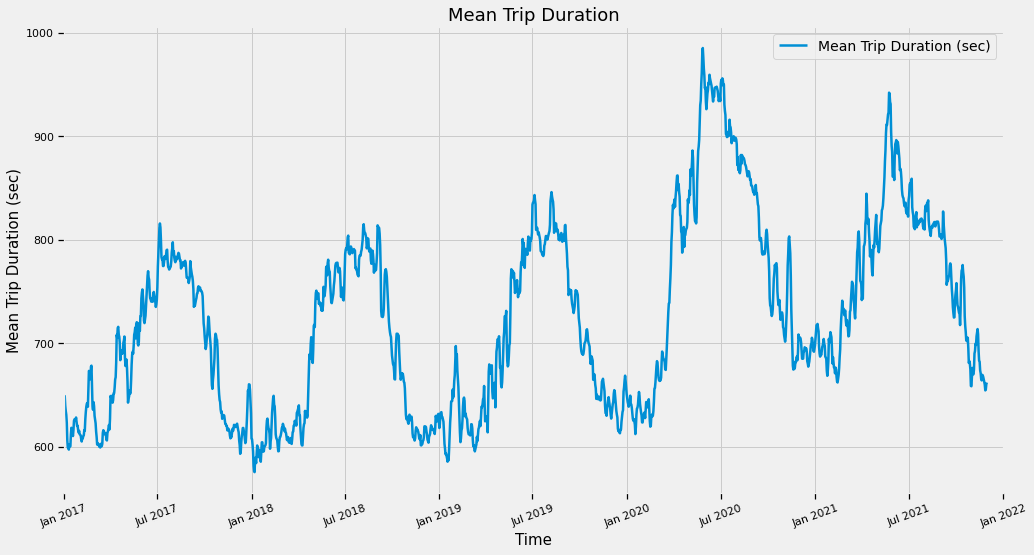

In [14]:
plt.figure(figsize=(15, 8))
ax = sns.lineplot(data=bike_rolling_day, x='Time', y='Mean Trip Duration (sec)', linewidth=2.5, label = 'Mean Trip Duration (sec)' )

ax.xaxis.set_major_locator(mdates.MonthLocator(interval = 6))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

ax.tick_params(axis='x', rotation=20)
ax.set_xlim([datetime.date(2017,1,1), datetime.date(2022,1,1)])

ax.set_xlabel('Time', fontsize = 15)
ax.set_ylabel('Mean Trip Duration (sec)', fontsize = 15)
ax.legend(fontsize = 14)
ax.set_title('Mean Trip Duration', fontsize=18)
plt.show()

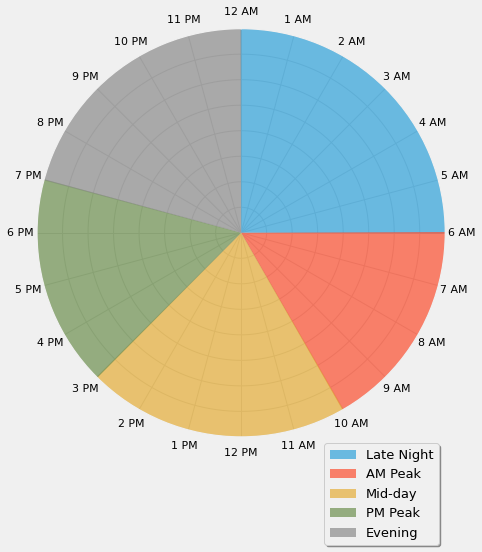

In [26]:
# Credit to https://stackoverflow.com/questions/56418087/how-to-plot-time-stamps-hhmm-on-python-matplotlib-clock-polar-plot

df = pd.DataFrame({'Time': {0: '03:00', 1: '08:00', 2: '12:30', 3: '17:00', 4: '21:30'}})

# Convert hour to angular unit
xs = pd.to_datetime(df['Time'],format= '%H:%M' )
xs = xs - datetime.datetime.strptime('00:00:00', '%H:%M:%S')
xs = xs.dt.seconds / (24 * 3600)
xs = xs * 2 * np.pi

# Plot timing
fig = plt.figure(figsize=(7,7))
ax = plt.subplot(111, projection = 'polar')
ax.bar(xs[0], 2, width = 1.578, alpha=0.7, color='#30a2da', label='Late Night')
ax.bar(xs[1], 2, width = 1.055, alpha=0.7, color='#fc4f30', label='AM Peak')
ax.bar(xs[2], 2, width = 1.31, alpha=0.7, color='#e5ae38', label='Mid-day')
ax.bar(xs[3], 2, width = 1.055, alpha=0.7, color='#6d904f', label='PM Peak')
ax.bar(xs[4], 2, width = 1.31, alpha=0.7, color='#8b8b8b', label='Evening')

# Make the labels go clockwise
ax.set_theta_direction(-1)

#Place Zero at Top
ax.set_theta_offset(np.pi/2)

#Set the circumference ticks
ax.set_xticks(np.linspace(0, 2*np.pi, 24, endpoint=False))

# set the label names
ticks = ['12 AM', '1 AM', '2 AM', '3 AM', '4 AM', '5 AM', '6 AM', '7 AM','8 AM','9 AM','10 AM','11 AM','12 PM', '1 PM', '2 PM', '3 PM', '4 PM',  '5 PM', '6 PM', '7 PM', '8 PM', '9 PM', '10 PM', '11 PM' ]
ax.set_xticklabels(ticks)

# suppress the radial labels
plt.setp(ax.get_yticklabels(), visible=False)

#Plot to the clockface limit
plt.ylim(0,2)

plt.legend(bbox_to_anchor=(1,0), fancybox=True, shadow=True, fontsize = 13)
plt.show()

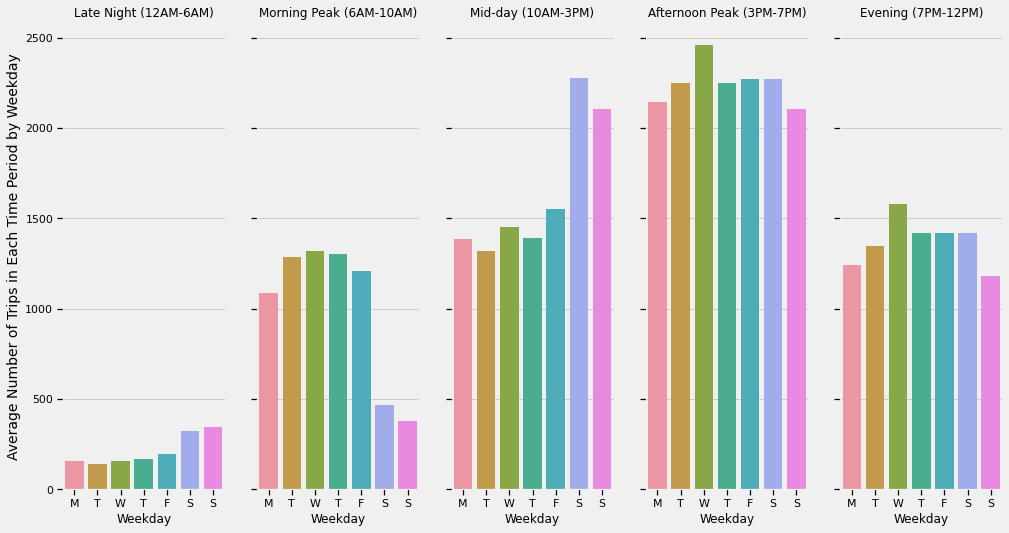

In [31]:
fig, axes = plt.subplots(1, 5, figsize=(15, 8), sharex=True, sharey=True)

#axes = np.array(axes).flatten()

period_names = ['Late Night (12AM-6AM)', 'Morning Peak (6AM-10AM)', 'Mid-day (10AM-3PM)', 'Afternoon Peak (3PM-7PM)', 'Evening (7PM-12PM)']

for p, ax in zip(sorted(bike_weather['Period'].unique()), axes):
    ax.set_title(period_names[(p-1)])
    
    # Set the y-axis range for consistency across the four graphs
    #ax.set_ylim(0, 6000)
    #ax.set_ylabel('Average Daily Trips')

    ride_by_weekday_in_period = (bike_weather[bike_weather['Period'] == p]
                             .groupby(['Weekday'])
                             .agg({'Total Trips': 'mean',
                                   'Member Trips': 'mean',
                                   'Casual Trips': 'mean',
                                   'Mean Trip Duration (sec)': 'mean'
                                    }
                                    ).reset_index())
    sns.barplot(
        x='Weekday', 
        y='Total Trips', 
        data=ride_by_weekday_in_period,
        ax=ax
    )
    ax.set_xticklabels(['M','T','W','T','F','S','S'])
    ax.set_ylabel('')  

axes[0].set_ylabel('Average Trips in Each Time Period by Weekday', fontsize=14)
plt.show()

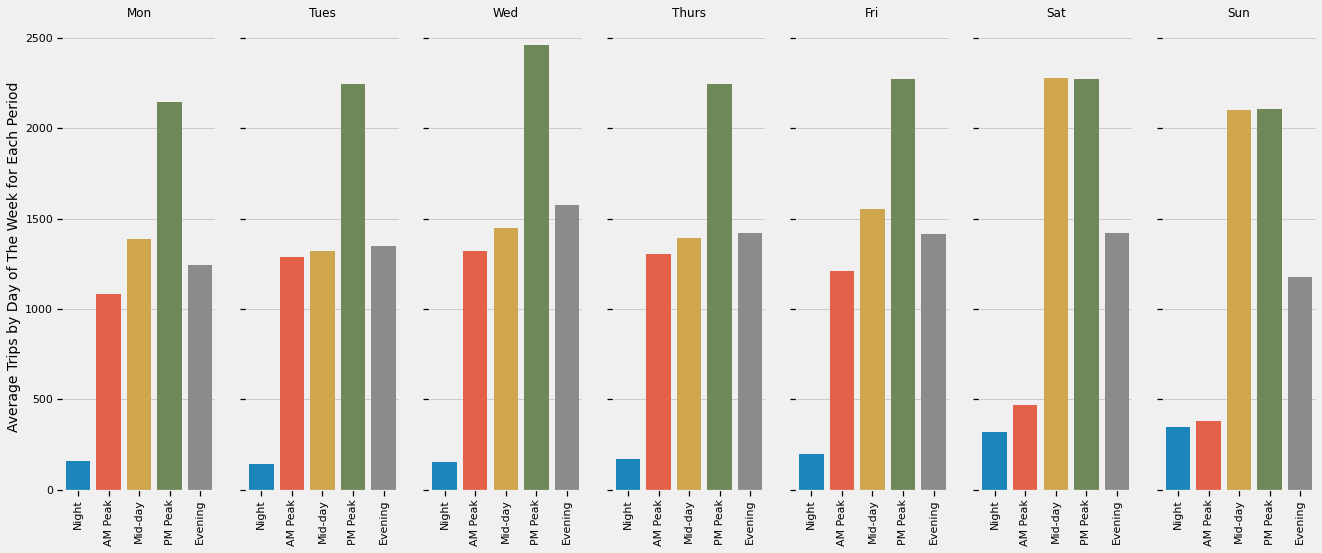

In [35]:
fig, axes = plt.subplots(1, 7, figsize=(20, 8), sharex=True, sharey=True)

#axes = np.array(axes).flatten()
day_names = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']

for w, ax in zip(sorted(bike_weather['Weekday'].unique()), axes):

    ride_by_weekday_in_period = (bike_weather[bike_weather['Weekday'] == w]
                             .groupby(['Period'])
                             .agg({'Total Trips': 'mean',
                                   'Member Trips': 'mean',
                                   'Casual Trips': 'mean',
                                   'Mean Trip Duration (sec)': 'mean'
                                    }
                                    ).reset_index())
    sns.barplot(
        x='Period', 
        y='Total Trips', 
        data=ride_by_weekday_in_period,
        ax=ax,
    )
    ax.set_title(day_names[(w)])
    ax.set_xlabel('') 
    ax.set_ylabel('')  
    ax.tick_params(axis='x', rotation=90)
    ax.set_xticklabels(['Night', 'AM Peak', 'Mid-day', 'PM Peak', 'Evening'])

axes[0].set_ylabel('Average Trips by Day of The Week for Each Period', fontsize=14)    
fig.show()

# Correlation

###In order to determine the most influential weather feature to bike share demand and trip duration, we need to investigate the relationship between all features in the dataset

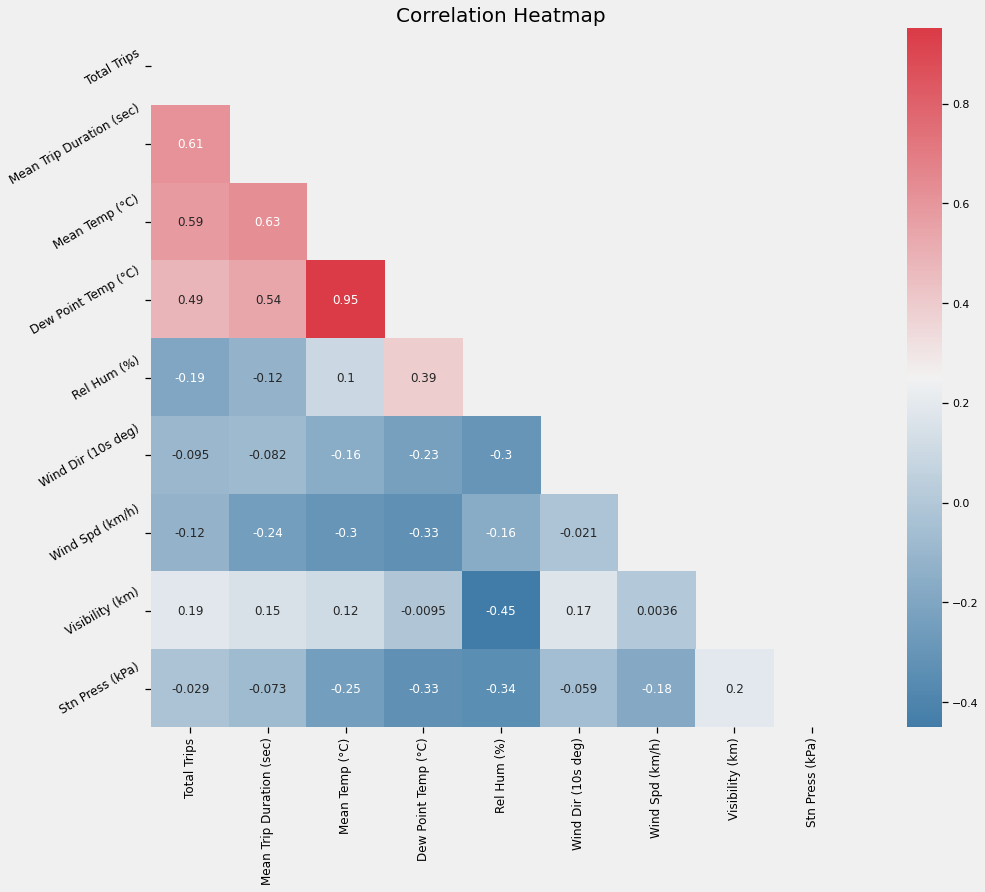

In [38]:
wea_var = ['Total Trips', 'Mean Trip Duration (sec)', 'Mean Temp (°C)',
       'Dew Point Temp (°C)', 'Rel Hum (%)', 'Wind Dir (10s deg)',
       'Wind Spd (km/h)', 'Visibility (km)', 'Stn Press (kPa)']

weather_reduced = bike_weather[wea_var]

correlation = weather_reduced.corr()
mask = np.zeros_like(correlation)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(18,12))
plt.title('Correlation Heatmap', fontsize=20)
ax = sns.heatmap(correlation, mask=mask, square=True, annot=True, cmap=sns.diverging_palette(240, 10, as_cmap=True))
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticklabels(ax.get_yticklabels(), rotation=30)      
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)     
plt.show()

### This correlation heatmap is a graphical representation of the correlation between different variables. It describes the relationship between continuous variables in our dataset (some weather variables and trip-related metrics)

### Total trips and mean trip duration is highly correlated to mean temperature and dew point teperature. Other weather features have very limited explainatory power to trip-related metrics.

### We can also use the pairplot to illustrate pairwise bivariate distribution between these variables:

In [15]:
#reduced_var = ['total trips', 'mean duration', 'Temp (°C)','Wind Spd (km/h)']
#weather_reduced_2 = bike_weather[reduced_var]

sns.pairplot(weather_reduced, diag_kind='kde', plot_kws={'s': 10, 'alpha' : .7})
plt.show()

Output hidden; open in https://colab.research.google.com to view.

### We can see that the temperature and dew point temperature are highly correlated. As such, we only need to use one of them to represent the temperature variable. Since the mean temperature have a higher correlation coefficient, it is selected as the variable representing the temperature.

### While the correlation heat map and pairplot demostrate the relationship between continuous variables; the weather condition is also represented by a categorical variable,weather condition, in the dataset:

(array([-1000.,     0.,  1000.,  2000.,  3000.,  4000.,  5000.]),
 <a list of 7 Text major ticklabel objects>)

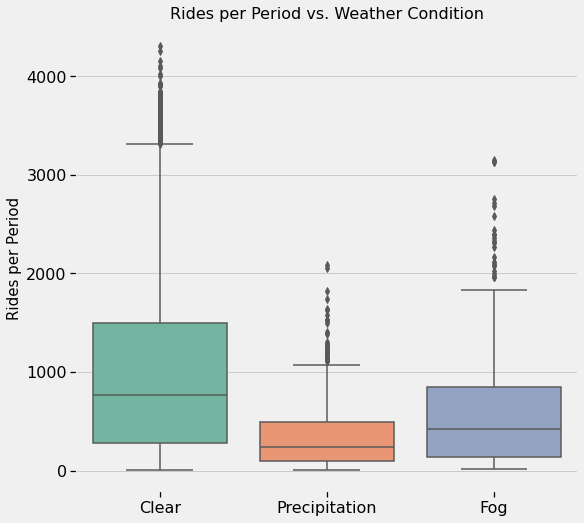

In [11]:
# Rides (two-side violin plot) vs Weather # , split = True, hue = 'is_holiday'

plt.figure(figsize=(8, 8))
ax = sns.boxplot(data=bike_weather, x = 'Weather', y = 'Member Trips', palette="Set2")#, inner = 'quartile')
ax.set_xlabel('', fontsize = 15)
ax.set_ylabel('Rides per Period', fontsize = 15)
ax.set_title("Rides per Period vs. Weather Condition", fontsize=16);
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

(array([-1000.,     0.,  1000.,  2000.,  3000.,  4000.,  5000.,  6000.,
         7000.]), <a list of 9 Text major ticklabel objects>)

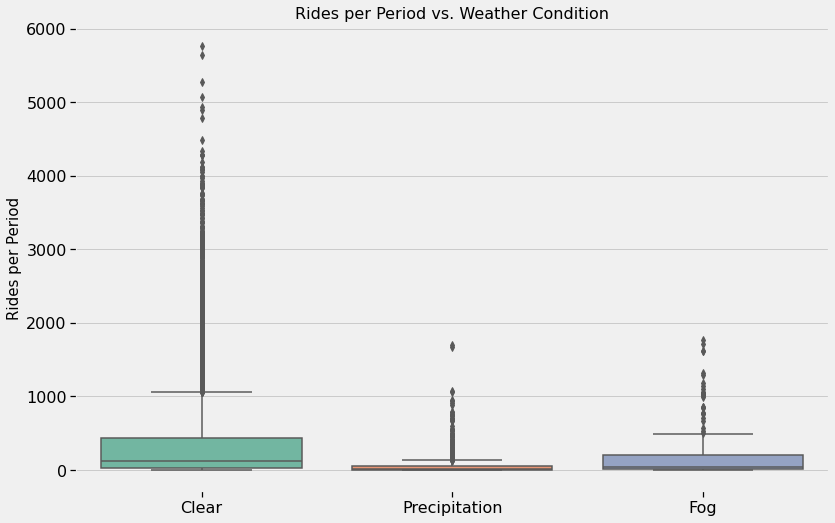

In [13]:
# side by side with above plot
plt.figure(figsize=(12, 8))
ax = sns.boxplot(data=bike_weather, x = 'Weather', y = 'Casual Trips', palette="Set2")#, inner = 'quartile')
ax.set_xlabel('', fontsize = 15)
ax.set_ylabel('Rides per Period', fontsize = 15)
ax.set_title("Rides per Period vs. Weather Condition", fontsize=16);
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

(array([ 300.,  400.,  500.,  600.,  700.,  800.,  900., 1000., 1100.,
        1200.]), <a list of 10 Text major ticklabel objects>)

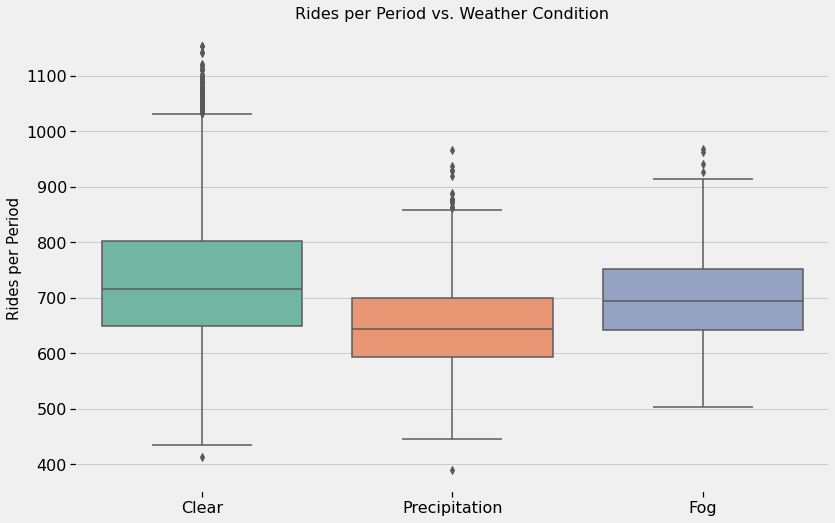

In [14]:
plt.figure(figsize=(12, 8))
ax = sns.boxplot(data=bike_weather, x = 'Weather', y = 'Mean Trip Duration (sec)', palette="Set2")#, inner = 'quartile')
ax.set_xlabel('', fontsize = 15)
ax.set_ylabel('Rides per Period', fontsize = 15)
ax.set_title("Rides per Period vs. Weather Condition", fontsize=16);
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

### It is clear that precipitation have an impact on whether a trip is initiated or not, but less of an effect on the duration of trips.

### Also important to note that the weather condition recorded for each trip is not as granular as other variables. Precipitation may not occur consistently temporally and spatially

### Let's explore the most significant bivariate relationship (rides vs temp) identified previously with detailed plot



plot number of trips and temp by period (like the one in twitter)

use more slides to explain graphs below

In [ ]:
# reserve for above plot

Fig 3 x = time, y=number of trips, hue=raining or not

casual or not

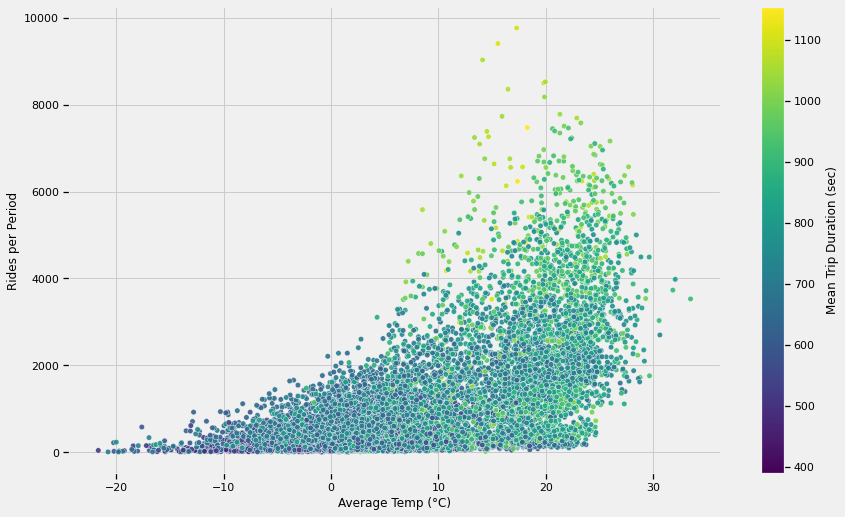

In [17]:
# Scatter plot
plt.figure(figsize=(13, 8))

ax = sns.scatterplot(data=bike_weather,
                     x = 'Mean Temp (°C)',
                     y = 'Total Trips', 
                     hue = 'Mean Trip Duration (sec)',
                     palette="viridis",
                     alpha=.9, s = 30, legend= False)

ax.set_xlabel('Average Temp (°C)')
ax.set_ylabel('Rides per Period')

# Construct color map
norm = plt.Normalize(bike_weather[ 'Mean Trip Duration (sec)'].min(), 
                     bike_weather[ 'Mean Trip Duration (sec)'].max())
sm = plt.cm.ScalarMappable(cmap = 'viridis', norm=norm)
cbar = ax.figure.colorbar(sm)
cbar.set_label( 'Mean Trip Duration (sec)')

plt.show()

Text(0, 0.5, 'Rides per Period')

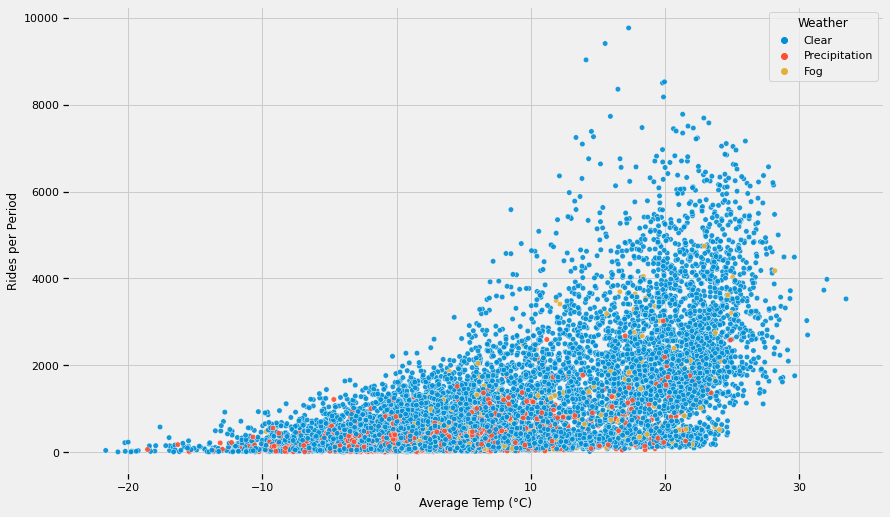

In [ ]:
# Scatter plot
plt.figure(figsize=(13, 8))

ax = sns.scatterplot(data=bike_weather,
                     x = 'Temp (°C)',
                     y = 'total trips', 
                     hue = 'Weather',
                     #palette="viridis",
                     alpha=.9, s = 30)

ax.set_xlabel('Average Temp (°C)')
ax.set_ylabel('Rides per Period')

AttributeError: ignored

<Figure size 936x576 with 0 Axes>

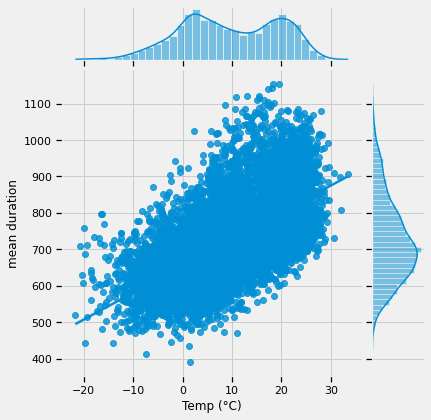

In [ ]:
# Scatter plot
plt.figure(figsize=(13, 8))

ax = sns.jointplot(data=bike_weather,
                     x = 'Temp (°C)',
                     y = 'mean duration', 
                     #hue = 'Weather',
                     #palette="viridis",
                     #alpha=.7, 
                     #s = 20, 
                     kind='reg')

ax.set_xlabel('Average Temp (°C)')
ax.set_ylabel('Mean Duration of Trips in the Period (sec)')